____________________________________________________________________________
Physics 474 - Spring 2023 <br>

Homework 5 - Solving SHO Time Independent Schrodinger Equation (TISE)<br>
eigenvalue equation

Solution

<font color='red'>Author: 


____________________________________________________________________

Simple example of solving Time Independent Schrodinger Equation (TISE)<br>
eigenvalue equation

$\hat{H}\Psi(x)=E\Psi(x)$ 

for the simple harmonic oscillator potential.

$\begin{eqnarray} 
V(x) &=& \frac{1}{2} k x^2 &=& \frac{1}{2} m \omega^2 x^2
\end{eqnarray}$

where $m$ is the mass of the particle in the potential and $\omega$ is the characteristic angular frequency given by  the "stiffness" $k$ of the potential.

$\omega = \sqrt{\frac{k}{m}}$

____________________________________________________________________________

Recall that the QM Hamiltonian is given by

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V$

Like we saw in the example for the infinite well we can represent the space centered finite difference $\nabla^2$ in 1D by an $nxn$ matrix

$\nabla^2= \frac{\partial^2}{\partial x^2}=
\frac{1}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}$

where we put the problem on a grid of $n$ points in $x$ with spacing $a$.


Then for the Hamiltonian we have

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V = \frac{-\hbar^2}{2ma^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}  + \frac{m\omega^2}{2}\begin{pmatrix}
x_1^2& 0 & 0& 0&0&\ldots \\
0 &x_2^2 & 0 &0 &0 &\ldots\\
0 & 0 & x_3^2& 0 & 0 & \ldots \\
0 & 0 &0&x_4^2&0&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix} 
$

Which gives us the eigenvalue equation
    
 $ \frac{-\hbar^2}{2ma^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}\begin{pmatrix}
\psi(x_0,t)\\ \psi(x_1,t)\\ \psi(x_2,t)\\ \vdots \\ \\ \\ \psi(x_n,t)
\end{pmatrix}  + 
\frac{m\omega^2}{2}\begin{pmatrix}
x_1^2& 0 & 0& 0&0&\ldots \\
0 &x_2^2 & 0 &0 &0 &\ldots\\
0 & 0 & x_3^2& 0 & 0 & \ldots \\
0 & 0 &0&x_4^2&0&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix} \begin{pmatrix}
\psi(x_0,t)\\ \psi(x_1,t)\\ \psi(x_2,t)\\ \vdots \\ \\ \\ \psi(x_n,t)
\end{pmatrix} =  E\begin{pmatrix}
\psi(x_0,t)\\ \psi(x_1,t)\\ \psi(x_2,t)\\ \vdots \\ \\ \\ \psi(x_n,t)
\end{pmatrix}  
$



_________________________________________________________
For this problem we will use atomic units ($au$)  where $m_e=1$, $\hbar =1$. (you can look this up on the web if you want more details)

we will assume:
- $m=1\, au$
- $\omega =1 \, au$

and use:
- $-10\, au \leq x \leq 10\, au$ in 2000 steps
- cut off the potential at a maximum of $15\,au$

Part 1: (7 points)

I want you to:
- print out the first  8 energy levels $E_n$ in $au$, $eV$ and $Joules$ to 4 decimal places.

1 a.u. = 4.35974E-18 Joule <br>
1 eV = 1.60217663E-19 Joule <br>
1 a.u. = 4.35974E-18 J / 1.60217663E-19 J/eV = 27.2113 eV



In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

m = 1
m_e = 1
w = 1
hbar = 1
x = np.linspace(-10,10,2000)
dx = x[1] - x[0]

Laplacian = np.empty((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            Laplacian[i,j] = -2/(dx**2)
        elif (j == i + 1) or (j == i - 1):
            Laplacian[i,j] = 1/(dx**2)
        else:
            Laplacian[i,j] = 0
            
V = np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            V[i,j] = m*w**2*x[j]**2/2
            if V[i,j] >= 15:
                V[i,j] = 15
            
H = -hbar**2/(2*m) * Laplacian + V

E,eigvec = la.eigh(H)

print('Energies of first 8 states:')
print('---------------------------')
for i in range(8):
    print('State ',i+1)
    print('Energy in a.u.: ', round(E[i],4))
    print('Energy in eV: ', round(E[i]*27.2113,4))
    print('Energy in Joules: ', round(E[i]/4.35974E-18,4))
    print('Exact solution energy in a.u.: ', round((i+0.5)*hbar*w,4))
    print('Difference between numerical and exact energies: ', round((i+0.5)*hbar*w - E[i],4))
    print('\n')

Energies of first 8 states:
---------------------------
State  1
Energy in a.u.:  0.5
Energy in eV:  13.6056
Energy in Joules:  1.1468502063272571e+17
Exact solution energy in a.u.:  0.5
Difference between numerical and exact energies:  0.0


State  2
Energy in a.u.:  1.5
Energy in eV:  40.8165
Energy in Joules:  3.4405362686476774e+17
Exact solution energy in a.u.:  1.5
Difference between numerical and exact energies:  0.0


State  3
Energy in a.u.:  2.5
Energy in eV:  68.0271
Energy in Joules:  5.734193630008719e+17
Exact solution energy in a.u.:  2.5
Difference between numerical and exact energies:  0.0


State  4
Energy in a.u.:  3.4999
Energy in eV:  95.2374
Energy in Joules:  8.027822289486291e+17
Exact solution energy in a.u.:  3.5
Difference between numerical and exact energies:  0.0001


State  5
Energy in a.u.:  4.4999
Energy in eV:  122.4474
Energy in Joules:  1.032142224114251e+18
Exact solution energy in a.u.:  4.5
Difference between numerical and exact energies:  0.0001



________________________________________________________
- How do these energies compare to what you expect from the exact solution $E_n=(n+\frac{1}{2})\hbar\omega$? (easiest to use atomic units in making this observation)
- What could you do to improve the accuracy?


___________________________________________________________
The energy levels calculated above from the eigenvalue problem

________________________________________________
Part 2: (8 points)

- make a plot of the potential
- on the same plot as the potential, plot the first 8 eigenfunctions $\psi_n(x)$, each centered at the energy level $E_n$. NOTE: normalize the maximum of each wavefunction to 0.4 in your plotting.

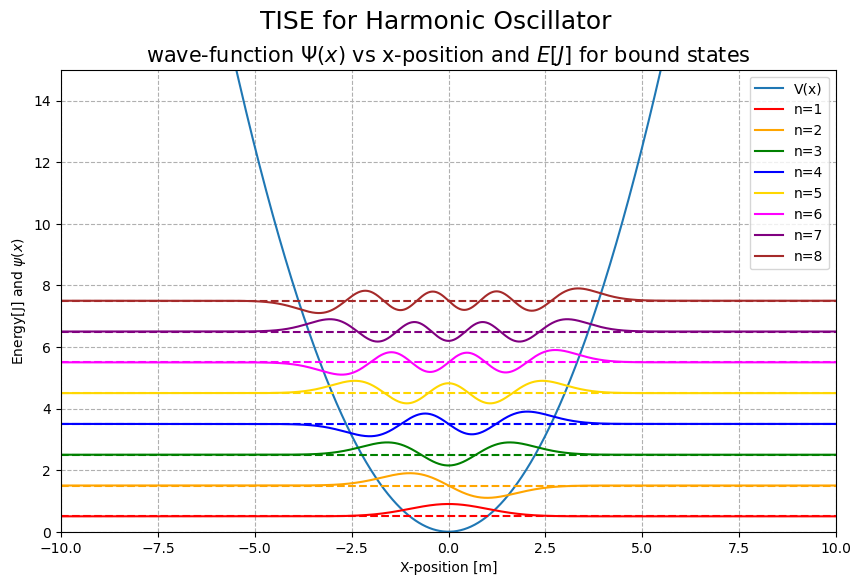

In [60]:
plt.figure(figsize=(10,6))
plt.subplot(111)
plt.xlim(-10,10)
plt.ylim(V.min(),V.max())

vplot = np.zeros(len(x))
for i in range(len(x)):
    vplot[i] = V[i,i]
    
plt.plot(x,vplot,label='V(x)')
plt.suptitle('TISE for Harmonic Oscillator',fontsize=18)

colors = ['red','orange','green','blue','gold','magenta','purple','brown']
for i in range(8):
    psi = eigvec[:,i]
    psi=psi/psi.max() * 0.4
    plt.plot(x,E[i]+psi,color=colors[i],label=r'n={:g}'.format(i+1))
    plt.plot([x.min(),x.max()],[E[i],E[i]],color=colors[i],linestyle='--')

plt.legend(loc='upper right')
plt.grid(linestyle='--')
plt.xlabel('X-position [m]')
plt.ylabel(r'Energy[J] and $\psi(x)$')
plt.title(r'wave-function $\Psi(x)$ vs x-position and $E[J]$ for bound states',fontsize=15)

plt.show()



_______________________________________________________________
- How do these solutions for $\psi_n(x)$ compare qualitatively to the exact solutions?

____________________________________________________________________